# Section 6 Time Series with Pandas

---

## DateTime Index

In [2]:
from datetime import datetime as dt

In [3]:
my_year = 2020
my_month = 1
my_day = 2
my_hour = 13
my_min = 30
my_sec = 15

In [5]:
my_date = dt(my_year,my_month,my_day)

In [6]:
my_date

datetime.datetime(2020, 1, 2, 0, 0)

In [7]:
my_date_time = dt(my_year,my_month,my_day,my_hour,my_min,my_sec)

In [8]:
my_date_time

datetime.datetime(2020, 1, 2, 13, 30, 15)

In [9]:
my_date_time.day

2

In [10]:
my_date_time.hour

13

In [11]:
type(my_date_time)

datetime.datetime

In [12]:
import numpy as np

In [13]:
np.array(['2020-03-15','2020-03-16','2020-03-17'])

array(['2020-03-15', '2020-03-16', '2020-03-17'], dtype='<U10')

In [14]:
np.array(['2020-03-15','2020-03-16','2020-03-17'],dtype='datetime64')

array(['2020-03-15', '2020-03-16', '2020-03-17'], dtype='datetime64[D]')

In [16]:
np.array(['2020-03-15','2020-03-16','2020-03-17'],dtype='datetime64[Y]')

array(['2020', '2020', '2020'], dtype='datetime64[Y]')

In [18]:
np.arange('2018-06-01','2018-06-23', 7, dtype='datetime64[D]')

array(['2018-06-01', '2018-06-08', '2018-06-15', '2018-06-22'],
      dtype='datetime64[D]')

In [19]:
np.arange('1968','1976', dtype='datetime64[Y]')

array(['1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975'],
      dtype='datetime64[Y]')

In [27]:
filespath = r"F:\Documentos\Udemy\Python for Time Series Data Analysis\UDEMY_TSA_FINAL\Data"

---

## DateTime Index Part Two

In [15]:
import pandas as pd
import numpy as np

In [2]:
pd.date_range('2020-01-01', periods=7, freq='D')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')

In [3]:
pd.date_range('Jan 01, 2018', periods=7, freq='D')

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07'],
              dtype='datetime64[ns]', freq='D')

In [4]:
pd.to_datetime(['1/2/2018', 'Jan 03, 2018'])

DatetimeIndex(['2018-01-02', '2018-01-03'], dtype='datetime64[ns]', freq=None)

In [10]:
pd.to_datetime(['2/1/2018', '3/1/2018'])

DatetimeIndex(['2018-02-01', '2018-03-01'], dtype='datetime64[ns]', freq=None)

In [11]:
pd.to_datetime(['2/1/2018', '3/1/2018'], format='%d/%m/%Y')

DatetimeIndex(['2018-01-02', '2018-01-03'], dtype='datetime64[ns]', freq=None)

In [13]:
pd.to_datetime(['2--1--2018', '3--1--2018'], format='%d--%m--%Y')

DatetimeIndex(['2018-01-02', '2018-01-03'], dtype='datetime64[ns]', freq=None)

In [16]:
data=np.random.randn(3,2)
cols = ['A', 'B']
print (data)

[[-2.06463208  0.60547039]
 [ 0.02210451 -0.01146583]
 [-0.46672133  0.13966665]]


In [17]:
idx = pd.date_range('2020-01-01',periods=3,freq='D')

df = pd.DataFrame(data, index=idx, columns=cols)

In [18]:
df

,A,B
2020-01-01,-2.064632,0.605470
2020-01-02,0.022105,-0.011466
2020-01-03,-0.466721,0.139667


In [19]:
df.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03'], dtype='datetime64[ns]', freq='D')

In [20]:
df.index.max()

Timestamp('2020-01-03 00:00:00', freq='D')

In [21]:
df.index.argmax()

2

In [23]:
df.index.min()

Timestamp('2020-01-01 00:00:00', freq='D')

In [24]:
df.index.argmin()

0

---

## Time resampling

In [26]:
import pandas as pd
import numpy as np

In [28]:
df = pd.read_csv(filespath+"\\"+"starbucks.csv")
df.head()

,Date,Close,Volume
0,2015-01-02,38.0061,6906098
1,2015-01-05,37.2781,11623796
2,2015-01-06,36.9748,7664340
3,2015-01-07,37.8848,9732554
4,2015-01-08,38.4961,13170548


In [29]:
df = pd.read_csv(filespath+"\\"+"starbucks.csv", index_col='Date')
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1006 entries, 2015-01-02 to 2018-12-31
Data columns (total 2 columns):
Close     1006 non-null float64
Volume    1006 non-null int64
dtypes: float64(1), int64(1)
memory usage: 23.6+ KB


In [31]:
df.index

Index(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
       '2015-01-09', '2015-01-12', '2015-01-13', '2015-01-14', '2015-01-15',
       ...
       '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20', '2018-12-21',
       '2018-12-24', '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-31'],
      dtype='object', name='Date', length=1006)

In [32]:
df = pd.read_csv(filespath+"\\"+"starbucks.csv", index_col='Date', parse_dates=True)
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [33]:
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

In [34]:
# daily ---> yearly
df.resample(rule='A')

DatetimeIndexResampler [freq=<YearEnd: month=12>, axis=0, closed=right, label=right, convention=start, base=0]

In [35]:
df.resample(rule='A').mean()

,Close,Volume
Date,,
2015-12-31,50.078100,8.649190e+06
2016-12-31,53.891732,9.300633e+06
2017-12-31,55.457310,9.296078e+06
2018-12-31,56.870005,1.122883e+07


In [37]:
def first_day(entry):

    # IS THERE AN ENTRY?
    if len(entry) != 0:
        # IF SO, RETURN FIRST ENTRY
        return entry[0]

In [38]:
df.resample(rule='A').apply(first_day)

,Close,Volume
Date,,
2015-12-31,38.0061,6906098
2016-12-31,55.0780,13521544
2017-12-31,53.1100,7809307
2018-12-31,56.3243,7215978


In [39]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


By using custom function we need to be cautious if datetime index since it differs, or point out to last day of year, not the date that in this case has the first entry data

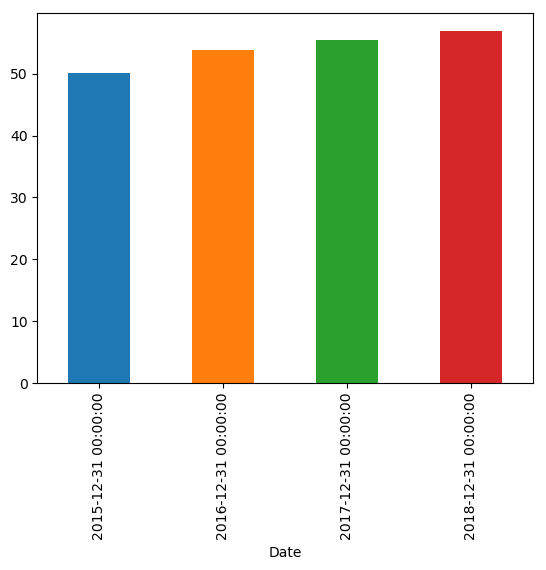

In [43]:
%matplotlib inline
df['Close'].resample('A').mean().plot.bar()

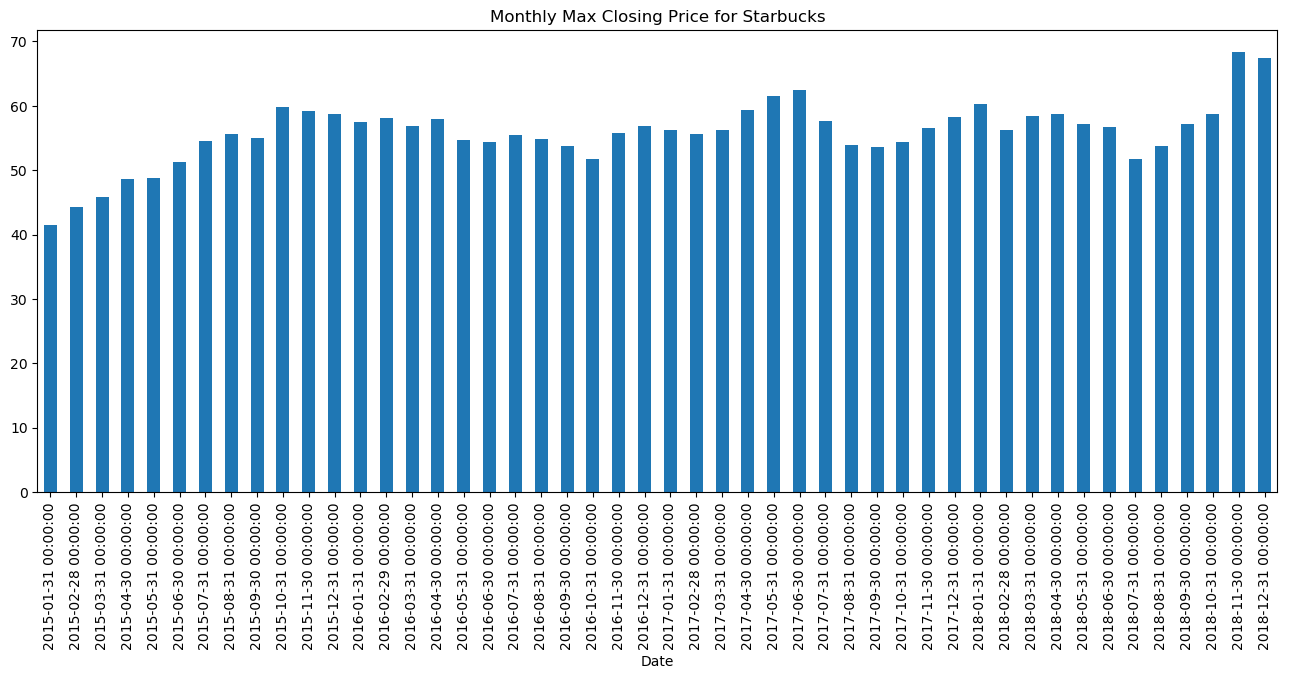

In [44]:
title = 'Monthly Max Closing Price for Starbucks'
df['Close'].resample('M').max().plot.bar(figsize=(16,6), title=title,color='#1f77b4');

---

## Time Shifting

In [45]:
import pandas as pd
import numpy as np
%matplotlib inline

In [46]:
df = pd.read_csv(filespath+"\\"+"starbucks.csv", index_col='Date', parse_dates=True)
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [47]:
df.tail()

,Close,Volume
Date,,
2018-12-24,60.56,6323252
2018-12-26,63.08,16646238
2018-12-27,63.20,11308081
2018-12-28,63.39,7712127
2018-12-31,64.40,7690183


In [48]:
df.shift(1)

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,38.0061,6906098.0
2015-01-06,37.2781,11623796.0
2015-01-07,36.9748,7664340.0
2015-01-08,37.8848,9732554.0
2015-01-09,38.4961,13170548.0
2015-01-12,37.2361,27556706.0
2015-01-13,37.4415,10021486.0
2015-01-14,37.7401,11040702.0


In [49]:
df.shift(1).tail()

,Close,Volume
Date,,
2018-12-24,61.39,23524888.0
2018-12-26,60.56,6323252.0
2018-12-27,63.08,16646238.0
2018-12-28,63.20,11308081.0
2018-12-31,63.39,7712127.0


In [50]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [51]:
df.shift(periods=1,freq='M').head()

,Close,Volume
Date,,
2015-01-31,38.0061,6906098
2015-01-31,37.2781,11623796
2015-01-31,36.9748,7664340
2015-01-31,37.8848,9732554
2015-01-31,38.4961,13170548


In [58]:
df.shift(periods=1, fill_value=0)

TypeError: shift() got an unexpected keyword argument 'fill_value'

---

## Roling and Expanding

In [ ]:
import pandas as pd

---

## Visualizing Time Series Data

In [ ]:
import pandas as pd

---

## Visualizing Time Series Data Part Two

In [ ]:
import pandas as pd

---